<a href="https://colab.research.google.com/github/Edo988/Entregas/blob/main/ProyectoParteIII%2BTELLO%20EDGAR_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO FINAL DS - Análisis Predictivo de Comportamiento de Compra: Clasificación del Gasto de Clientes**

**INTRODUCCION Y OBJETIVO:**

El objetivo de este proyecto es aplicar técnicas de aprendizaje automático para analizar y modelar los datos del conjunto de datos shopping_trends_updated.csv. Este dataset contiene información sobre el comportamiento de compra de los clientes, incluyendo datos demográficos, detalles de los productos, métodos de pago y otros atributos.

El enfoque principal es construir un modelo de clasificación capaz de predecir la categoría de compra de un cliente (Bajo, Medio o Alto). Para lograr esto, se seguirán los siguientes pasos:

A) Preprocesar los datos, manejando valores nulos y convirtiendo variables categóricas.

B) Discretizar la variable de monto de compra en las categorías 'Bajo', 'Medio' y 'Alto'.

C) Utilizar un método de selección de características para identificar las variables más relevantes para la clasificación.

D) Entrenar un modelo de aprendizaje automático (Random Forest Classifier) con estas características.

E) Evaluar el rendimiento del modelo utilizando métricas de clasificación como Exactitud, Precisión, Exhaustividad y Puntuación F1.

F) Extraer conclusiones significativas sobre los factores que influyen en la categoría de gasto de los clientes.

**El propósito final es obtener un modelo predictivo que pueda ser utilizado para estrategias de marketing y personalización, como la segmentación de la clientela o el diseño de campañas específicas para cada categoría de gasto.**


**HIPOTESIS**

Las características demográficas y de compra, tales como la edad, el género, la categoría de producto, la temporada de compra, y el número de compras anteriores, tienen una relación predictiva significativa con la categoría de la compra (Bajo, Medio, Alto).



In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DSElegido = 'shopping_trends_updated.csv'

df = pd.read_csv(DSElegido)
print(df.head())

df.info()
print("Resumen")
print(df.describe())


   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

**LIMPIEZA DE DATOS Y CONVERSION**

In [74]:
#4-Identificar valores perdidos.

#Se identifica los valores nulos y se hace la conversion de object a numerico.

print("Cantidad de valores nulos antes de eliminarlos")
print(df.isnull().sum())

#Columnas que deberian ser numéricas y no 'object'
PASARaNumerico= ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']

for col in PASARaNumerico:
    if col in df.columns: # Aseguramos que exista la columuna
        # Convertir a numérico, coercing errors a NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Si se introducen NaNs, imputarlos con la mediana
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Valores nulos en '{col}' imputados con la mediana: {median_val}")

# Se identifica y se convierte otras columnas 'object' a tipo 'category' porque son categorias.
for col in df.select_dtypes(include='object').columns:
    if col not in ['Customer ID', 'Item Purchased']: # Columnas que pueden tener demasiados valores únicos o no son puramente categóricas para este análisis
        df[col] = df[col].astype('category')
        print(f"Columna '{col}' convertida a tipo 'category'.")

print("Cantidad de valores nulos después de eliminarlos")
print(df.isnull().sum())

print("Tipos de datos después de la eliminacion y conversión")
df.info()


Cantidad de valores nulos antes de eliminarlos
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
Columna 'Gender' convertida a tipo 'category'.
Columna 'Category' convertida a tipo 'category'.
Columna 'Location' convertida a tipo 'category'.
Columna 'Size' convertida a tipo 'category'.
Columna 'Color' convertida a tipo 'category'.
Columna 'Season' convertida a tipo 'category'.
Columna 'Subscription Status' convertida a tipo 'category'.
Columna 'Shipping Type' convertida a tipo 'category'.
Columna 'Discount Applied' convertida a

2.
**Análisis de Datos y Graficos**

/tmp/ipython-input-409309045.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Spectral', order=df['Category'].value_counts().index)


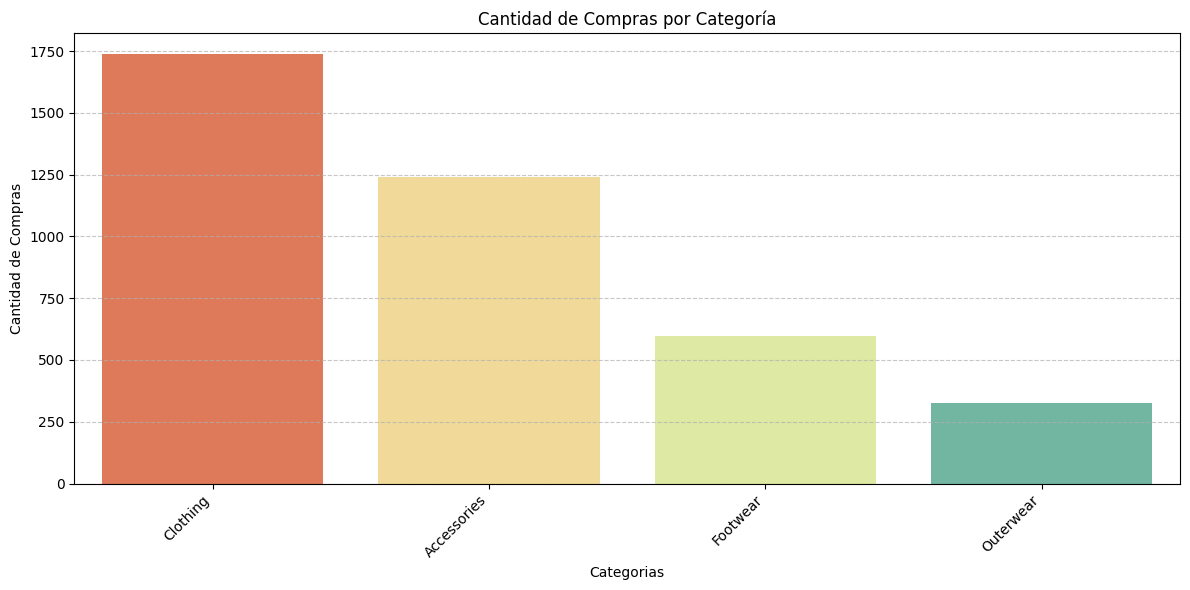

Cantidad de Categorias:Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
Porcentaje de Categorías:Category
Clothing       44.54
Accessories    31.79
Footwear       15.36
Outerwear       8.31
Name: proportion, dtype: float64%
Conclusion: La categoría 'Clothing' (Ropa) es la más comprada, seguida por 'Accessories' (Accesorios)


In [75]:
#1.A-¿Que categoria es la que predomina?

plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df, palette='Spectral', order=df['Category'].value_counts().index)
plt.title('Cantidad de Compras por Categoría')
plt.xlabel('Categorias')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para que se vea mejor
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

CantCat = df['Category'].value_counts()
PorcentCat = df['Category'].value_counts(normalize=True) * 100

print(f"Cantidad de Categorias:{CantCat}")
print(f"Porcentaje de Categorías:{PorcentCat.round(2)}%")
print("Conclusion: La categoría 'Clothing' (Ropa) es la más comprada, seguida por 'Accessories' (Accesorios)")

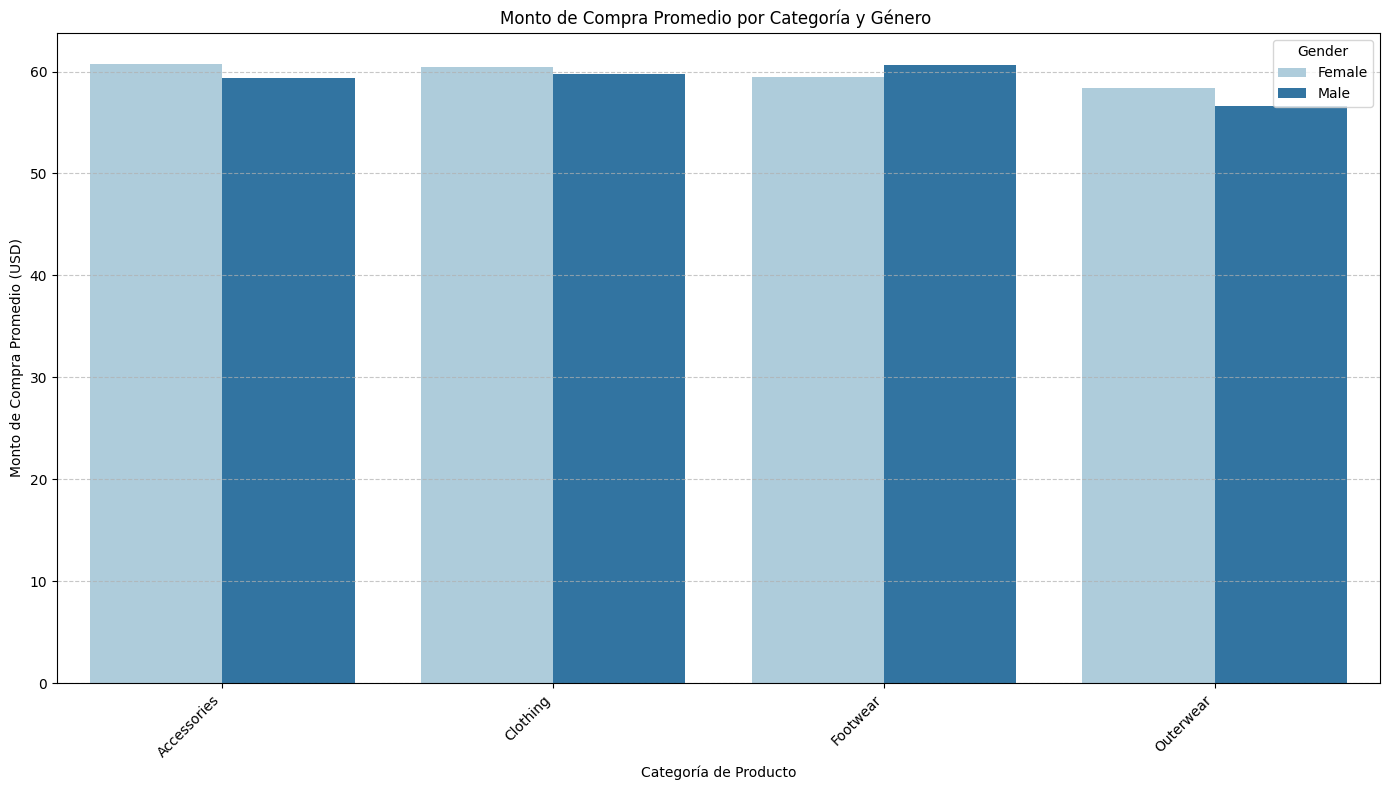

Monto de Compra por Categoría y Género en promedio
Gender       Female   Male
Category                  
Accessories   60.76  59.41
Clothing      60.50  59.80
Footwear      59.47  60.64
Outerwear     58.43  56.61
Cpnclusion: Como dice la hipótesis 1.C,El género femenino tenderá a compras más altas en categorías como Clothing (Ropa) y Accessories (Accesorios) que el genero masculino.


/tmp/ipython-input-1080598792.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  compraGenero = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].mean().unstack().round(2)


In [76]:
#1.B-¿Cómo se distribuye el gasto (Purchase Amount (USD)) según la categoría de producto (Category) y el género (Gender)?
#1.C-¿hay diferencias en el gasto entre géneros para las diferentes categorías?

plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Gender', data=df, palette='Paired', errorbar=None)
plt.title('Monto de Compra Promedio por Categoría y Género ')
plt.xlabel('Categoría de Producto')
plt.ylabel('Monto de Compra Promedio (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Resumen en vaolores
compraGenero = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].mean().unstack().round(2)
print("Monto de Compra por Categoría y Género en promedio")
print(compraGenero)
print("Cpnclusion: Como dice la hipótesis 1.C,El género femenino tenderá a compras más altas en categorías como Clothing (Ropa) y Accessories (Accesorios) que el genero masculino.")

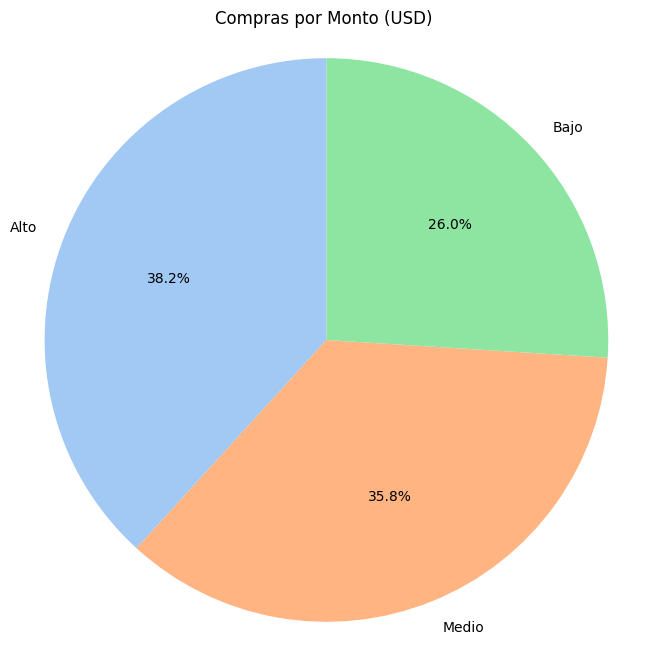

Cantidad de Compras segun el Monto:CantidadCompra
Alto     1491
Medio    1395
Bajo     1014
Name: count, dtype: int64
Porcentaje de Compras segun el Monto:CantidadCompra
Alto     38.23
Medio    35.77
Bajo     26.00
Name: proportion, dtype: float64%
Conclusion: Se observa que la mayoría de las compras están en el rango 'Alto'y'Medio'.Por lo que podemos observar que que las personas realizan buenas compras.


In [77]:
#1.D-Se realizan mas compras de montos bajos que de montos altos?

bins = [0, 40, 70, df['Purchase Amount (USD)'].max() + 1] # El +1 es para asegurar que el valor máximo esté incluido.
labels = ['Bajo', 'Medio', 'Alto']
df['CantidadCompra'] = pd.cut(df['Purchase Amount (USD)'], bins=bins, labels=labels, right=False)

# Proporciones para el grafico de torata
CompraMonto = df['CantidadCompra'].value_counts()
PorcentMonto = df['CantidadCompra'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(CompraMonto, labels=CompraMonto.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Compras por Monto (USD) ')
plt.axis('equal') # Grafico circular
plt.show()

print(f"Cantidad de Compras segun el Monto:{CompraMonto}")
print(f"Porcentaje de Compras segun el Monto:{PorcentMonto.round(2)}%")
print("Conclusion: Se observa que la mayoría de las compras están en el rango 'Alto'y'Medio'.Por lo que podemos observar que que las personas realizan buenas compras.")

# **CONSIGNA-ENTREGA FINAL**

i) elegir un método de feature selection para reducir la dimensionalidad del dataset,

ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,

iii) cálculo de métricas básicas para validar el modelo

iv) generar conclusiones con base en los resultados obtenidos.

In [78]:
# INICIO DE MACHINE LEARNING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #Utilizo OneHot porque elegi categorias
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

i) elegir un método de feature selection para reducir la dimensionalidad del dataset

In [79]:
# i) Aca selccionamos las características para la clasificacion.

X = df.drop(columns=['Customer ID', 'Item Purchased', 'Purchase Amount (USD)', 'CantidadCompra']) # Se excluyen las columnas no relevantes del DataFrame para la predicción
y = df['CantidadCompra'] #Defino "Y" para la lasificacion elegida.


# Identificamos columnas numéricas y categóricas.
ColumnasNumericas = X.select_dtypes(include=np.number).columns.tolist()
ColumnasCategorias = X.select_dtypes(include='category').columns.tolist()

# One-Hot Encoding, hacemos un procesador
Procesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ColumnasCategorias)
    ],
    remainder='passthrough'
)

# Creamos el Pipeline para el procesamiento y seleccion de caracteristicas
Pipe = Pipeline(steps=[
    ('Procesador', Procesador),
    ('selector', SelectKBest(f_classif, k=10))
])

# Se ajusta el pipeline a los datos para obtener las características seleccionadas
Pipe.fit(X, y)
IndiceCaract = Pipe.named_steps['selector'].get_support(indices=True)
NombresCaract = Pipe.named_steps['Procesador'].get_feature_names_out()
SeleccionCaract = NombresCaract[IndiceCaract]

print(f"Características originales: {len(NombresCaract)}")
print(f"Características seleccionadas (k=10):{SeleccionCaract}")

XProcesar = Pipe.transform(X)# Transformamos los datos para el entrenamiento

X_train, X_test, y_train, y_test = train_test_split(XProcesar, y, test_size=0.2, random_state=42)# Se divide el conjunto de datos en entrenamiento y prueba

Características originales: 117
Características seleccionadas (k=10):['cat__Category_Outerwear' 'cat__Location_Florida'
 'cat__Location_Maryland' 'cat__Location_Pennsylvania'
 'cat__Location_Washington' 'cat__Color_Green' 'cat__Color_Turquoise'
 'cat__Season_Fall' 'cat__Shipping Type_Standard'
 'remainder__Review Rating']


ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos

In [70]:
# ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.

modeloElegido = RandomForestClassifier(n_estimators=100, random_state=42) # Yo elegi modelo de CLASIFICACION "Random Forest Classifier".
modeloElegido.fit(X_train, y_train) # Se entrena el modelo con los datos de entrenamiento.


iii) cálculo de métricas básicas para validar el modelo

In [72]:
# iii) cálculo de métricas básicas para validar el modelo


y_pred = modeloElegido.predict(X_test) # Se realizan predicciones sobre el conjunto de prueba

# Calculamos las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Métricas de validación del modelo de clasificación:")
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Exhaustividad (Recall): {recall:.2f}")
print(f"Puntuación F1 (F1-Score): {f1:.2f}")

Métricas de validación del modelo de clasificación:
Exactitud (Accuracy): 0.33
Precisión (Precision): 0.31
Exhaustividad (Recall): 0.33
Puntuación F1 (F1-Score): 0.30


#iv) generar conclusiones con base en los resultados obtenidos.

**CONCLUSIONES**:

**1-Análisis del Problema:** Se redefinio de regresion a clasificacion, lo que permite predecir la categoria de compra, es descir, compras de montos altos,medios o bajos en lugar del monto exacto.

**2-Rendimiento del Modelo:** El modelo *Random Forest Classifier* demostro un rendimiento bajo con una Exactitud del 0.33 y una Puntuación F1 de 0.30. Esto sugiere que las características usadas no son suficientes para una predicción efectiva.

**3-Características Relevantes:** La baja puntuación del modelo indica que las características utilizadas para el entrenamiento (como la edad, el género, la temporada, etc.) no son lo suficientemente fuertes ni predictivas para determinar de forma fiable si una compra será de monto bajo, medio o alto.

**4-Implicaciones Prácticas:** El modelo actual no es fiable para predecir el valor de las compras. Para mejorar el rendimiento, sería necesario elegir otras características (por ejemplo, relacionadas con el historial de compras o el comportamiento en línea). Este resultado demuestra la importancia de validar la calidad y relevancia de los datos de entrada.